In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [48]:
import os
import sys
from glob import glob 
from datetime import date, datetime, timedelta
import json

In [4]:
import pytz

In [96]:
import numpy as np
import pandas as pd

In [68]:
import xarray as xr
import salem

In [69]:
salem.__version__

'0.2.2-18-g2d10174'

In [21]:
dpath = 'data/TRMM/daily/extended_SP'

In [22]:
import pathlib

In [23]:
dpath = pathlib.Path.home().joinpath(dpath)

In [24]:
lfiles = dpath.glob('*.nc')

In [25]:
lfiles = list(lfiles)

In [29]:
lfiles.sort()

In [33]:
lfiles[-1]

PosixPath('/home/nicolasf/data/TRMM/daily/extended_SP/3B42RT_daily.2019.02.19.nc')

In [35]:
today_utc = datetime.utcnow()

In [41]:
datetime.strptime('2019.02.19', '%Y.%m.%d').date()

datetime.date(2019, 2, 19)

In [34]:
xr.open_dataset(lfiles[-1])

<xarray.Dataset>
Dimensions:  (lat: 300, lon: 460, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2019-02-19
  * lat      (lat) float32 -49.875 -49.625 -49.375 ... 24.375 24.625 24.875
  * lon      (lon) float32 125.125 125.375 125.625 ... 239.375 239.625 239.875
Data variables:
    trmm     (time, lat, lon) float32 ...

In [43]:
dset_30d = xr.open_mfdataset(lfiles[-30:])

In [44]:
dset_30d

<xarray.Dataset>
Dimensions:  (lat: 300, lon: 460, time: 30)
Coordinates:
  * lat      (lat) float32 -49.875 -49.625 -49.375 ... 24.375 24.625 24.875
  * lon      (lon) float32 125.125 125.375 125.625 ... 239.375 239.625 239.875
  * time     (time) datetime64[ns] 2019-01-21 2019-01-22 ... 2019-02-19
Data variables:
    trmm     (time, lat, lon) float32 dask.array<shape=(30, 300, 460), chunksize=(1, 300, 460)>

In [62]:
shapes_ipath = pathlib.Path.home().joinpath('data/shapefiles/ICU/clipped/countries_converted')

In [63]:
lshapefiles = shapes_ipath.glob('*/*.shp')

In [64]:
with open('../data/dict_countries.json', 'r') as fj: 
    dict_countries = json.load(fj)

In [66]:
filename = '/home/nicolasf/data/shapefiles/ICU/clipped/countries_converted/Fiji/shapes_Fiji.shp'

In [70]:
shapes = salem.read_shapefile(filename)
country_fname = os.path.basename(filename)[7:-4]
country_name = dict_countries[country_fname]
print("processing {}".format(country_name))

processing Fiji


In [73]:
subset = dset_30d.salem.subset(shape=shapes, margin=2)

In [77]:
roi = subset.salem.roi(shape=shapes, all_touched=True)

In [81]:
trmm_ts = roi.mean(dim=('lat','lon')).to_dataframe()

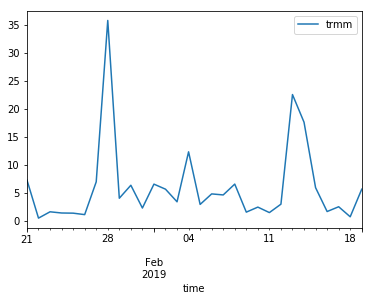

In [82]:
trmm_ts.plot()

In [106]:
last_date = trmm_ts.index[-1]

In [104]:
trmm_total = trmm_ts.sum()

### reads in the climatology 

In [83]:
country_fname

'Fiji'

In [84]:
country_name

'Fiji'

In [97]:
clim_path = pathlib.Path.cwd().parent / 'outputs/climatologies'

In [99]:
window = 30

In [109]:
climo = pd.read_csv(clim_path / 'climo_{}_days_{}.csv'.format(window, country_fname), index_col=[0,1])

In [110]:
climo.head()

count        mean        std        min         10%         20%  \
month day                                                                    
1     1     17.0  180.134555  84.063324  81.177226  110.766164  126.154116   
      2     17.0  182.497569  88.690198  75.819726  115.262479  125.059835   
      3     17.0  182.852007  91.879769  75.451208  106.886318  122.021376   
      4     17.0  186.325179  96.835340  75.701561  106.974631  113.902956   
      5     17.0  188.830982  95.340569  75.568236  106.748123  133.173181   

                  30%       33.3%         40%         50%         60%  \
month day                                                               
1     1    133.615652  139.635427  155.154464  168.684509  173.938277   
      2    129.341758  137.406251  155.587331  162.347754  181.744141   
      3    123.701034  135.678525  160.116482  161.950034  185.040504   
      4    139.865467  148.121495  160.876880  162.964911  187.586119   
      5    146.989437  150.239994  154.008516  166.793236  194.057805   

                66.6%         70%         80%         90%         max  
month day                                                              
1     1    186.356715  192.315825  202.415388  250.522217  445.098352  
      2    192.913280  194.847141  203.031757  257.201205  459.471385  
      3    194.274844  194.887228  204.547282  263.184929  463.508441  
      4    194.349034  195.573905  212.450251  260.286223  493.689010  
      5    198.156052  201.513833  216.982798  249.736707  500.073630

In [107]:
last_date.month

2

In [108]:
last_date.day

19

In [116]:
climo = climo.loc[(last_date.month, last_date.day)]

In [121]:
deciles = ["{}%".format(x) for x in range(10, 100, 10)]

In [122]:
deciles

['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']

In [144]:
deciles = climo.loc[deciles,]

In [162]:
loc = np.digitize(trmm_total,deciles)[0]

In [166]:
deciles.index[loc]

'60%'

processing Vanuatu North


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Wallis & Futuna


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Society Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Northern Marianas


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Solomon Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Kiribati: Phoenix Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tuvalu


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Austral Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing New Caledonia


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Northern Cook Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Southern Cook Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Federated States of Micronesia


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing American Samoa


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Niue


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tuamotu / Gambier Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tokelau


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Papua New Guinea


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Marshall Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Palau


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Kiribati: Gilbert Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Kiribati: Line Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Pitcairn Islands


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Tonga


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Samoa


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Guam


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Vanuatu South


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Nauru


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Marquesas


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


processing Fiji


/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


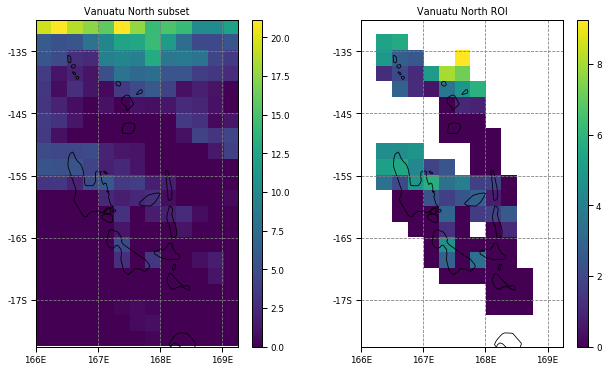

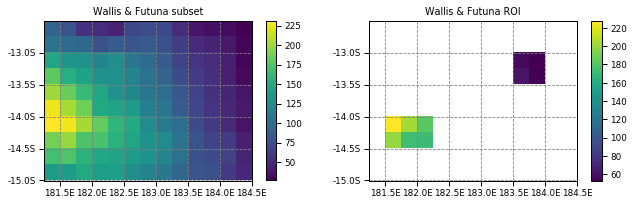

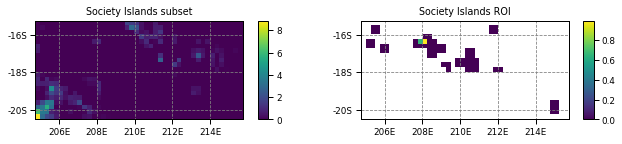

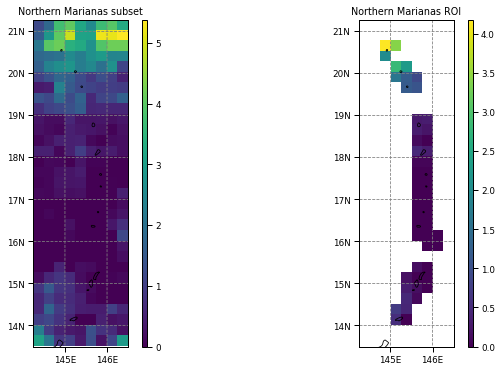

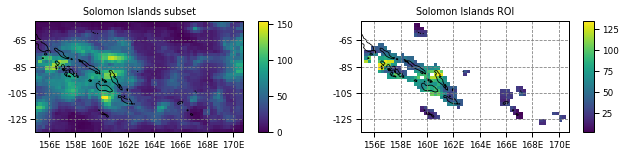

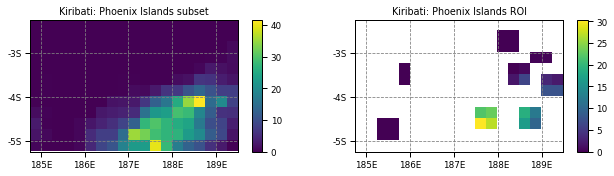

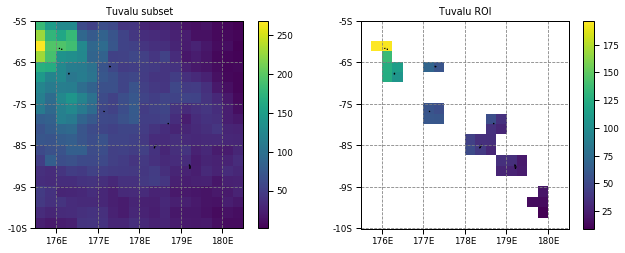

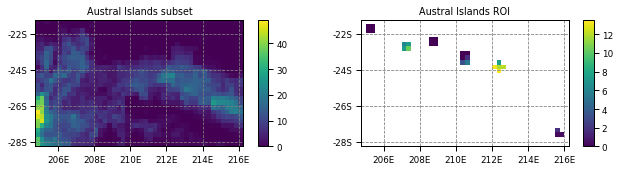

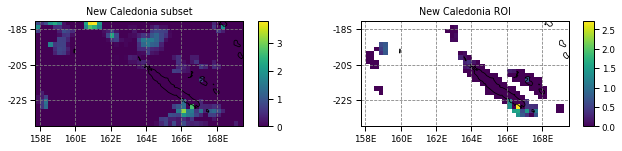

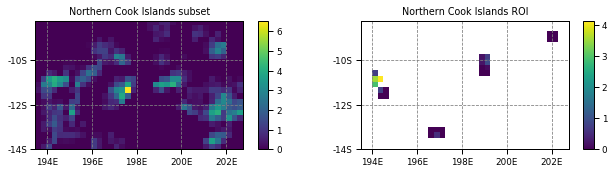

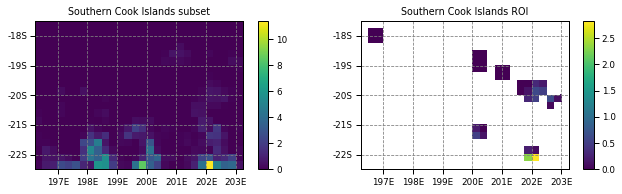

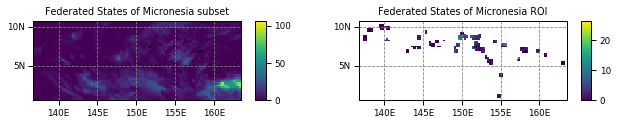

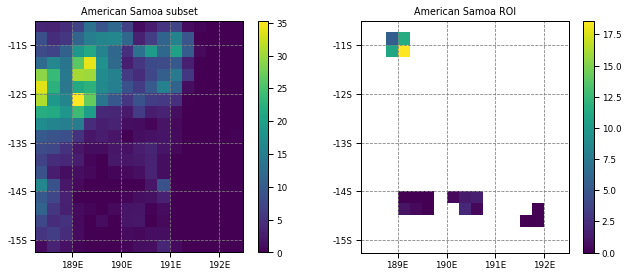

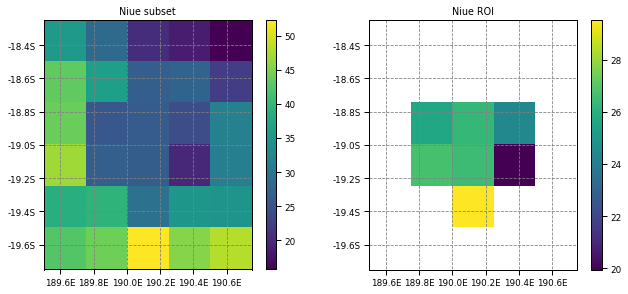

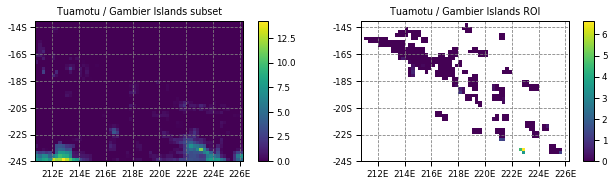

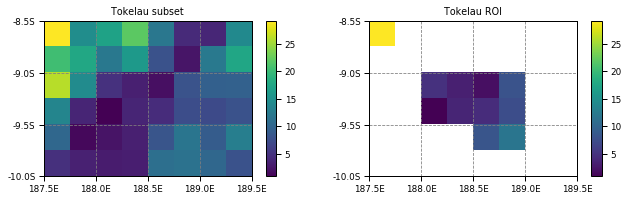

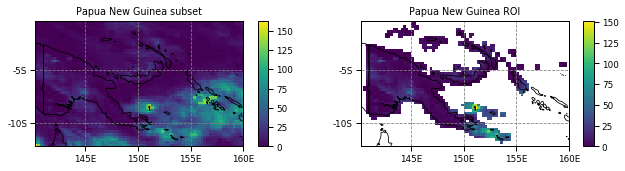

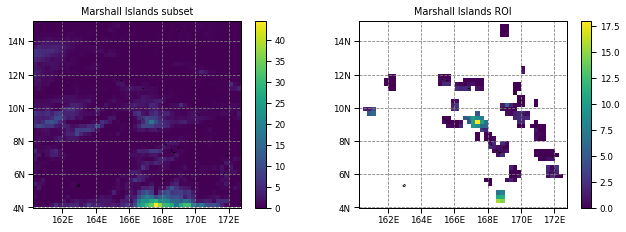

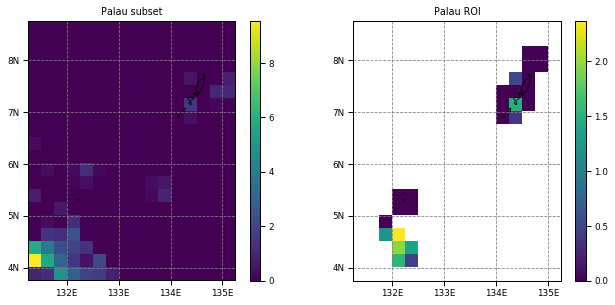

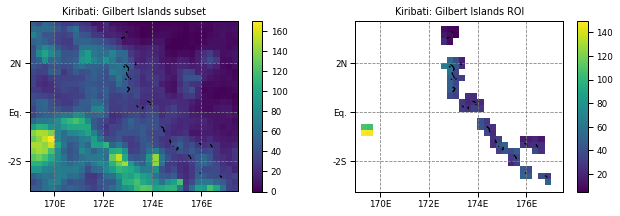

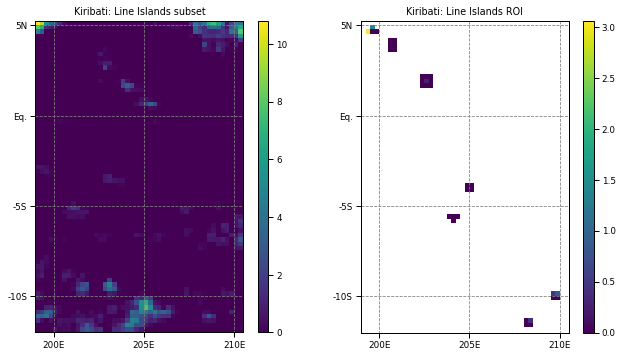

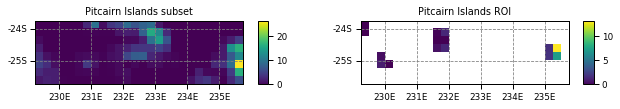

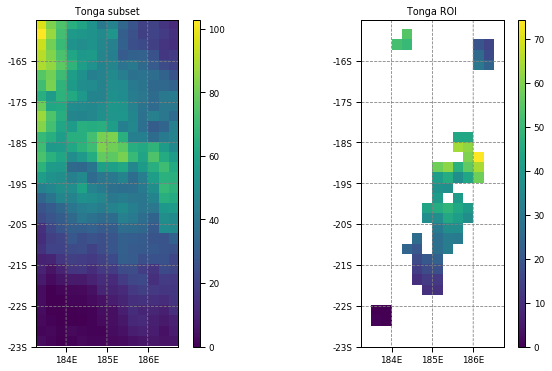

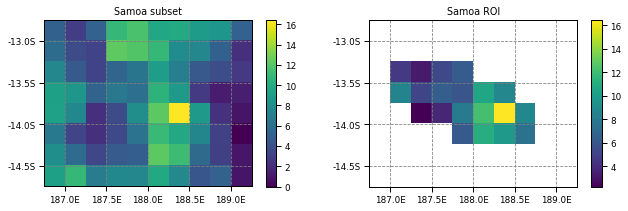

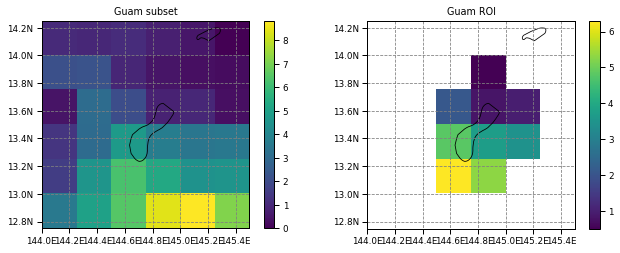

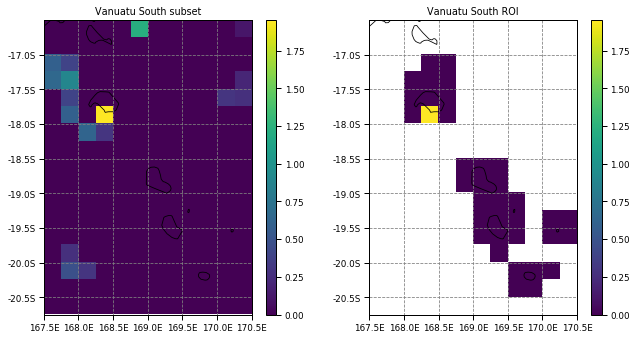

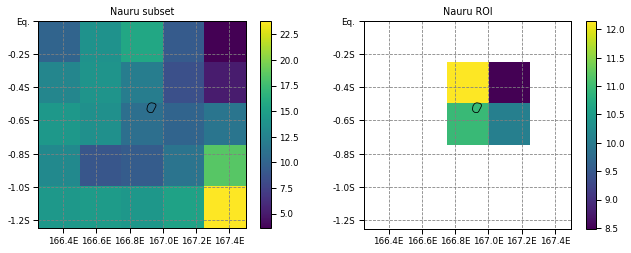

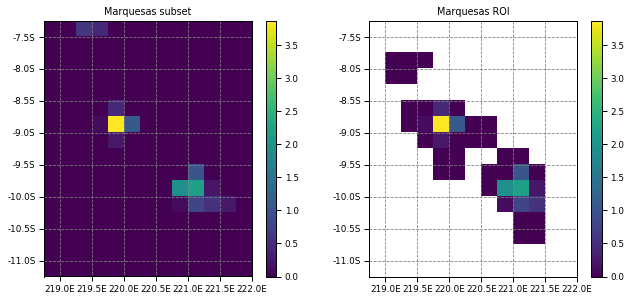

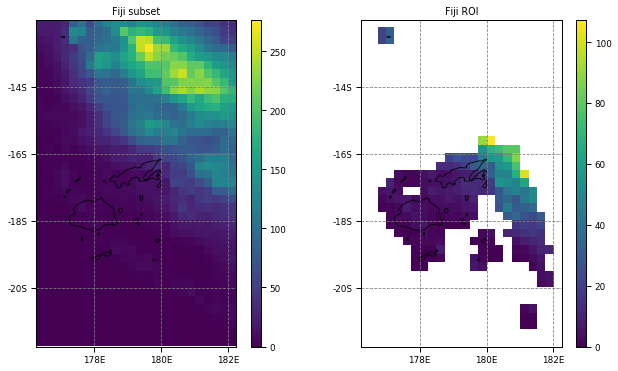

In [18]:

subset = dset.salem.subset(shape=shapes, margin=2)
roi = subset.salem.roi(shape=shapes, all_touched=True)
f, axes = plt.subplots(ncols=2, figsize=(10, 6))
f.subplots_adjust(wspace=0.4)
ax = axes[0]
subset.isel(time=-1).trmm.salem.quick_map(ax=ax)
ax.set_title("{} subset".format(country_name))
ax=axes[1]
roi.isel(time=-1).trmm.salem.quick_map(ax=ax)
ax.set_title("{} ROI".format(country_name))